In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import cv2
from imageProcessing import * 
import matplotlib.pyplot as plt  

In [4]:
sigma_D = 2
sigma_I = 4

filter_constants_D = compute_filter_constants(sigma=sigma_D)
 
filter_constants_I = compute_filter_constants(sigma=sigma_I) 



In [32]:


frameWidth = 640
frameHeight = 480
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FPS, 30)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10,150)


while True:
    success, img = cap.read()

    I = (rgb_to_gray(img))
    I_cop = I[150:640-150, 100:480-100]

    I_show = np.uint8(I_cop)
    
    response = harrisResponse_opt(I_cop, 0.06, filter_constants_D, filter_constants_I)

    response = np.uint8(response)

    color_mapped_image = cv2.applyColorMap(response, cv2.COLORMAP_JET)

    if np.count_nonzero(response) > 0 : 
        y_cords, x_cords = extract_local_maxima(response, 0.006)
        #x_cords, y_cords = remove_close_points(x_cords, y_cords, 100)
        for x, y in zip(x_cords,y_cords): 
            cv2.circle(I_show, (x, y), 5, (255, 255, 0))

    cv2.imshow("Response", I_show)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

KeyboardInterrupt: 

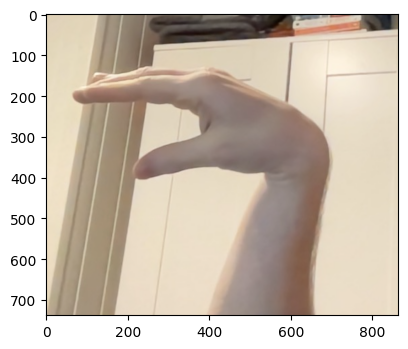

In [73]:
from PIL import Image 

path = "./hand.png"

hand_image = Image.open(path)
image_array = np.array(hand_image)
gs_image = rgb_to_gray(image_array)
response = harrisResponse(gs_image, 3, 5, 0.006)

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1,2,1)
plt.imshow(hand_image, cmap="gray", vmin=0, vmax=255)



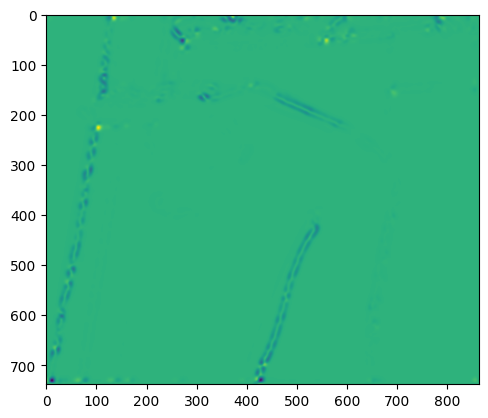

In [15]:
plt.imshow(response)

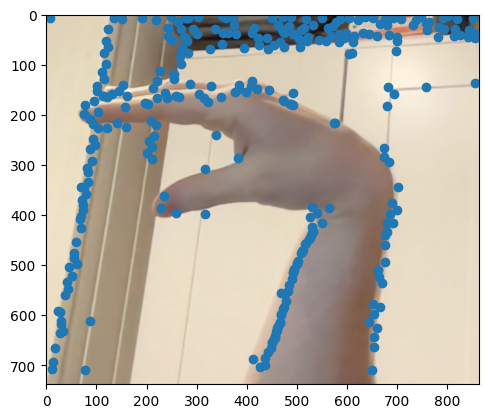

In [51]:
y_cords, x_cords = extract_local_maxima(response, 0.0006)

plt.imshow(hand_image)
plt.scatter(x_cords, y_cords)
plt.show()


In [47]:
y_cords[204:205]


array([385])

In [48]:
x_cords[204:205]

array([228])

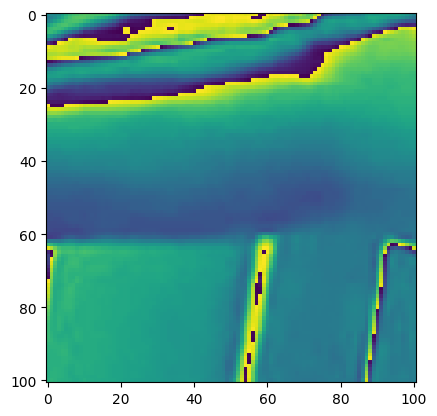

<BarContainer object of 16 artists>

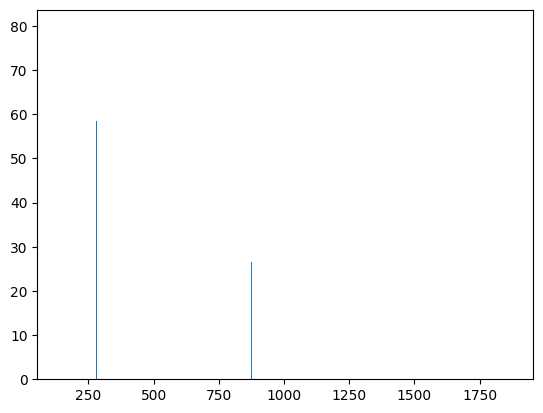

In [71]:
arr = gs_image[204-50:205+50, 204-50:205+50]
arr

hist, bins = np.histogram(arr, 16)
plt.imshow(arr)
plt.show()
plt.bar(hist, bins[:16])
